In [1]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
iris = sns.load_dataset('iris')
tips = sns.load_dataset('tips')

In [8]:
data = iris.copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


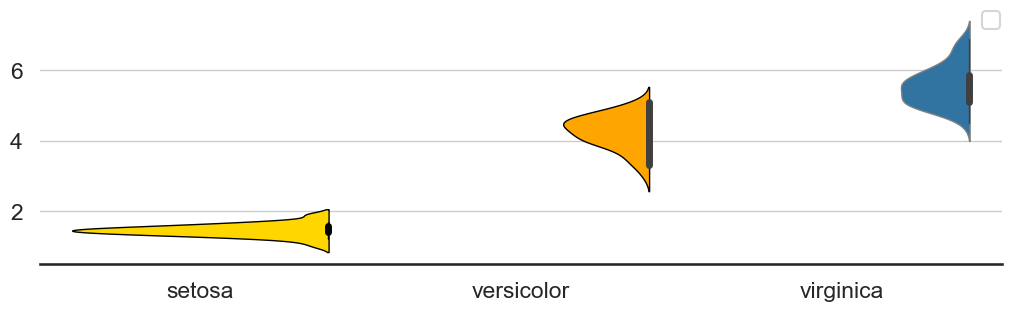

In [106]:
dataset = data
hue: str=None
cmap: str=None
number: int=0
linewidth: float=.1
figsize: tuple=(10,3)
violin_cmap: list=['gold','orange']
title: str=None

x='species'
y='petal_length'

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_style("white")

fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
sns.violinplot(data=dataset, x=x, y=y, ax=ax,
            color=cmap, hue=hue, split=True, palette=cmap, linewidth=linewidth)

v_left_color = violin_cmap[0]
v_right_color = violin_cmap[1]

# 바이올린의 왼쪽부분
violins_Left = [c for i, c in enumerate(ax.collections) if i%2 == 0]  
[v.set_edgecolor("gray") for v in violins_Left]
[v.set_linewidth(1) for v in violins_Left]
violins_Left[number].set_facecolor(v_left_color)    # facecolor 변경
violins_Left[number].set_linewidth(1)               # line 굵기 변경
violins_Left[number].set_edgecolor("k")             # edgecolor 변경

# 바이올린의 오른쪽부분
violins_Right = [c for i, c in enumerate(ax.collections) if i%2 == 1]
[v.set_edgecolor("gray") for v in violins_Right]
[v.set_linewidth(1) for v in violins_Right]
violins_Right[number].set_facecolor(v_right_color)  # facecolor 변경
violins_Right[number].set_linewidth(1)              # line 굵기 변경
violins_Right[number].set_edgecolor("k")            # edgecolor 변경

# box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[number*2].set_color("k")                 # whisker 색상 변경
ls[number*2+1].set_color("k")                 # box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

# # spines 제거, grid 추가, xlabel 제거, ylabel 제거
ax.set_ylim()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title(title)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)
legend = ax.legend()
legend.remove()
fig.legend(loc="upper right", ncol=2)

plt.show()

In [109]:
print(len(ax.collections))
print(ax.collections[0])
print(ax.collections[1])
print(ax.collections[2])

3
